## Semana 1

###  Exploring & understanding the features

In [1]:
import pandas as pd

# Read the HDF5 file using pandas
data_frame_fcnc = pd.read_hdf('fcnc_pythia_sanitised_features.h5')

# Get the number of rows
num_rows = data_frame_fcnc.shape[0]

print('Number of rows: {}'.format(num_rows))

# Explore the data
data_frame_fcnc.head()


Number of rows: 90548


,Electron_Multi,FatJet1_Eta,FatJet1_Mass,FatJet1_PT,FatJet1_Phi,FatJet1_Tau1,FatJet1_Tau2,FatJet1_Tau3,FatJet1_Tau4,FatJet1_Tau5,...,gen_decay2,gen_decay_filter,gen_filter,gen_label,gen_n_btags,gen_sample,gen_sample_filter,gen_split,gen_weights,gen_xsec
0,2,1.408853,15.150869,339.182312,2.350262,1.396943,0.710451,0.109013,0.000000,0.000000,...,0,None,PyDelphes,signal,1,tZFCNC,tZFCNC_PyDelphes,test,7.762202e-09,0.001285
1,1,-2.481838,7.208333,247.036240,-2.280740,0.428710,0.205213,0.000000,0.000000,0.000000,...,0,None,PyDelphes,signal,1,tZFCNC,tZFCNC_PyDelphes,val,7.762202e-09,0.001285
2,0,1.476267,94.220718,238.014694,-1.788097,94.256210,2.418446,1.585315,1.127324,0.431098,...,0,None,PyDelphes,signal,1,tZFCNC,tZFCNC_PyDelphes,train,7.762249e-09,0.001285
3,1,0.647480,13.459283,230.971832,-1.032663,1.227122,0.467150,0.164008,0.000000,0.000000,...,0,None,PyDelphes,signal,1,tZFCNC,tZFCNC_PyDelphes,train,7.762249e-09,0.001285
4,0,2.106436,97.490242,698.399902,-3.059983,36.555862,2.937936,1.799140,1.093004,0.589724,...,0,None,PyDelphes,signal,1,tZFCNC,tZFCNC_PyDelphes,train,7.762249e-09,0.001285


In [2]:
# Read the HDF5 file using pandas
data_frame_bkg = pd.read_hdf('bkg_pythia_sanitised_features.h5')

# Get the number of rows
num_rows = data_frame_bkg.shape[0]

print('Number of rows: {}'.format(num_rows))

# Explore the data
data_frame_bkg.head()


Number of rows: 1002490


,Electron_Multi,FatJet1_Eta,FatJet1_Mass,FatJet1_PT,FatJet1_Phi,FatJet1_Tau1,FatJet1_Tau2,FatJet1_Tau3,FatJet1_Tau4,FatJet1_Tau5,...,gen_decay2,gen_decay_filter,gen_filter,gen_label,gen_n_btags,gen_sample,gen_sample_filter,gen_split,gen_weights,gen_xsec
0,2,-1.988600,52.710262,229.350952,0.728242,36.148926,23.039709,16.949991,14.424411,12.000529,...,0,2L,HT250to500,bkg,1,Zjj,Zjj_HT250to500,train,0.000018,11.9635
1,0,0.528382,61.115589,315.538910,-0.863614,32.592808,22.366640,16.285843,13.938633,11.180016,...,0,2L,HT250to500,bkg,1,Zjj,Zjj_HT250to500,test,0.000018,11.9635
2,0,1.479911,98.012802,251.109573,-3.133624,90.252274,33.646885,30.612156,27.973904,23.729696,...,0,2L,HT250to500,bkg,1,Zjj,Zjj_HT250to500,val,0.000018,11.9635
3,2,0.926899,-0.000007,240.909348,0.835656,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,2L,HT250to500,bkg,1,Zjj,Zjj_HT250to500,val,0.000018,11.9635
4,0,0.781194,72.234299,206.020386,-0.320449,48.886372,20.743645,16.572512,13.070706,11.269534,...,0,2L,HT250to500,bkg,1,Zjj,Zjj_HT250to500,val,0.000018,11.9635


### Histograms of Signal vs Background

#### 1. Normalize the data

In [3]:
# Z-score normalization

# copy the data
data_frame_fcnc_norm = data_frame_fcnc.copy()
data_frame_bkg_norm = data_frame_bkg.copy()


for feature in data_frame_fcnc.columns:
    if feature in ['gen_decay_filter', 'gen_filter', 'gen_label', 'gen_n_btags', 'gen_sample', 'gen_sample_filter', 'gen_split', 'gen_decay2','gen_decay1', 'gen_xsec']:
        pass
    else: data_frame_fcnc_norm[feature] = (data_frame_fcnc[feature] - data_frame_fcnc[feature].mean()) / data_frame_fcnc[feature].std()
        
for feature in data_frame_bkg.columns:
    if feature in ['gen_decay_filter', 'gen_filter', 'gen_label', 'gen_n_btags', 'gen_sample', 'gen_sample_filter', 'gen_split','gen_decay2','gen_decay1','gen_xsec']:
        pass
    else:  data_frame_bkg_norm[feature] = (data_frame_bkg[feature] - data_frame_bkg[feature].mean()) / data_frame_bkg[feature].std()


#### 2. Plot histograms Signal Vs Background

In [4]:
l=[]
for i in data_frame_fcnc.columns:
    if  i in ['gen_decay_filter', 'gen_filter', 'gen_label', 'gen_n_btags', 'gen_sample', 'gen_sample_filter', 'gen_split','gen_xsec']:pass
    elif i not in data_frame_bkg.columns.values: pass
    else: l.append(i)

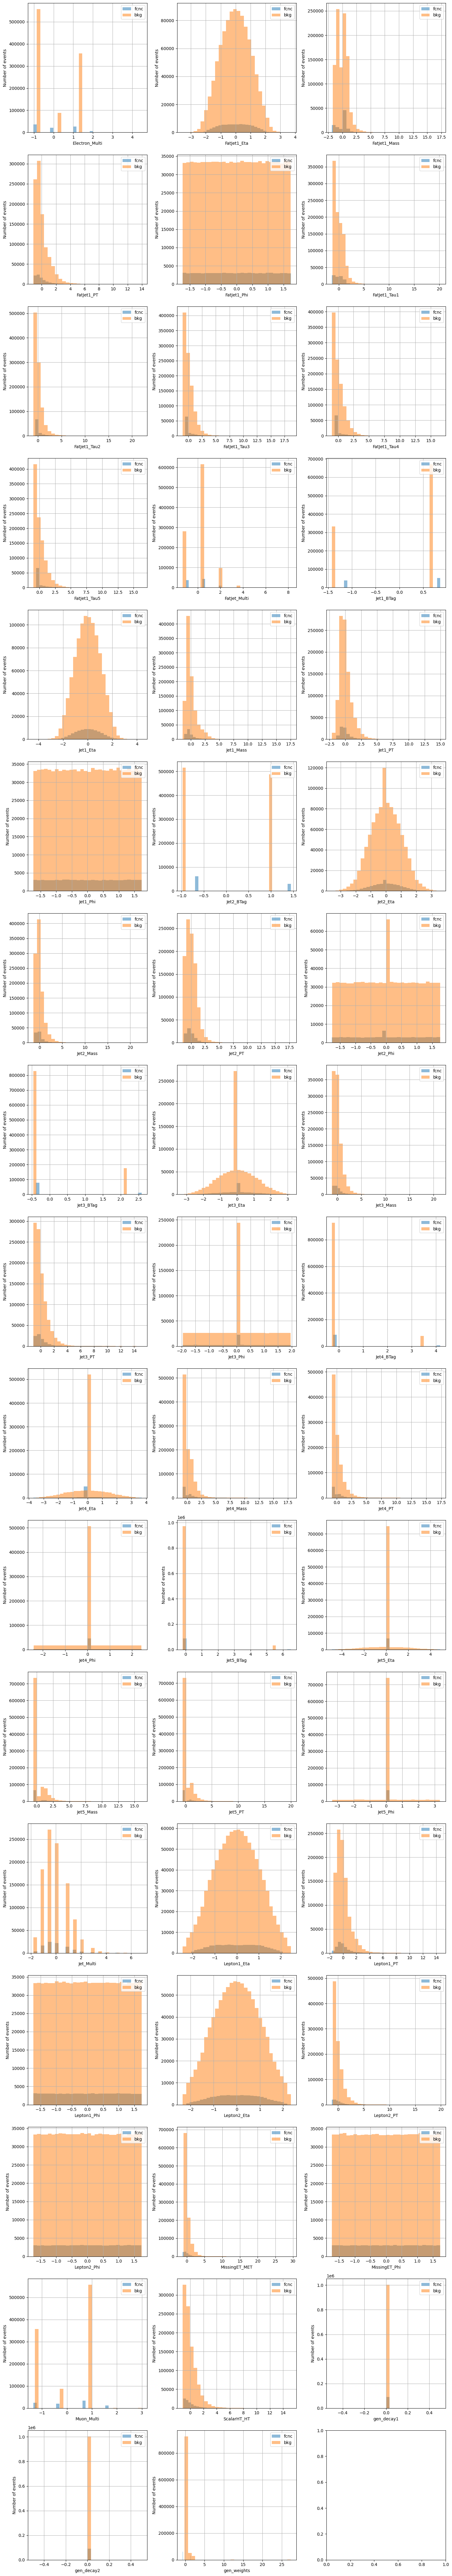

In [5]:
import matplotlib.pyplot as plt
import math

# Plot histograms for each feature
num_features = len(data_frame_fcnc.columns)
num_plots_per_row = 3
num_rows = math.ceil(len (l) /3)

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))


for i, feature in enumerate(l):
    if feature in ['gen_decay_filter', 'gen_filter', 'gen_label', 'gen_n_btags', 'gen_sample', 'gen_sample_filter', 'gen_split','gen_xsec']:
        continue
    elif feature not in data_frame_bkg.columns.values:
        continue
    else:
        row_index = i // num_plots_per_row
        col_index = i % num_plots_per_row

        ax = axes[row_index, col_index]
        data_frame_fcnc_norm[feature].hist(alpha=0.5, bins=30, label='fcnc', ax=ax)
        data_frame_bkg_norm[feature].hist(alpha=0.5, bins=30, label='bkg', ax=ax)
        ax.set_xlabel(feature)
        ax.set_ylabel('Number of events')
        ax.legend(loc='upper right')

plt.tight_layout()
plt.show()



### SVMs

#### Data preprocessing 

In [6]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve


# Split the data into train, validation and test sets
data_frame_fcnc_norm_train = data_frame_fcnc_norm.loc[data_frame_fcnc_norm['gen_split'] == 'train']
data_frame_bkg_norm_train =  data_frame_bkg_norm.loc[data_frame_bkg_norm['gen_split'] == 'train']
a,_ = data_frame_fcnc_norm_train.shape

data_frame_fcnc_norm_test = data_frame_fcnc_norm.loc[data_frame_fcnc_norm['gen_split'] == 'test']
data_frame_bkg_norm_test =  data_frame_bkg_norm.loc[data_frame_bkg_norm['gen_split'] == 'test']

b,_ = data_frame_fcnc_norm_test.shape

data_frame_fcnc_norm_val = data_frame_fcnc_norm.loc[data_frame_fcnc_norm['gen_split'] == 'val']
data_frame_bkg_norm_val =  data_frame_bkg_norm.loc[data_frame_bkg_norm['gen_split'] == 'val']

c,_ = data_frame_fcnc_norm_val.shape


# get 500 points of each dataset and  join the datasets (randomly)
train_fcnc = data_frame_fcnc_norm_train.sample(n=500)
train_bkg = data_frame_bkg_norm_train.sample(n=500)
train = pd.concat([train_fcnc, train_bkg])
train = train.sample(frac=1, random_state=42)


test_fcnc = data_frame_fcnc_norm_test.sample(n=500)
test_bkg = data_frame_bkg_norm_test.sample(n=500)
test= pd.concat([test_fcnc, test_bkg])
test = train.sample(frac=1, random_state=42)


val_fnc = data_frame_fcnc_norm_val.sample(n=500)
val_bkg = data_frame_bkg_norm_val.sample(n=500)
val = pd.concat([val_fnc, val_bkg])
val = val.sample(frac=1, random_state=42)


# get the weights for each dataset
w_train = train[['gen_xsec']]
w_test = test[['gen_xsec']]
w_val = val[['gen_xsec']]


# change the labels to 0 and 1 and get the labels for each dataset

train = train.replace(['signal'], 1)
train= train.replace(['bkg'], 0)
y_train = train[['gen_label']]
x_train = train[['MissingET_MET', 'Jet1_BTag']]


test = test.replace(['signal'], 1)
test= test.replace(['bkg'], 0)
y_test = test[['gen_label']]
x_test = test[['MissingET_MET', 'Jet1_BTag']]

val = val.replace(['signal'], 1)
val= val.replace(['bkg'], 0)
y_val = val[['gen_label']]
x_val = val[['MissingET_MET', 'Jet1_BTag']]



#### Train

In [7]:
import numpy as np

# transform y_train into a single array instead of  an array of arrays
y_train_arr = np.concatenate( y_train.values, axis=0 )


In [8]:
# Renormalize weights
w_train[y_train_arr == 1] = (w_train[y_train_arr == 1] / w_train[y_train_arr == 1].sum()) * w_train.shape[0] / 2
w_train[y_train_arr == 0] = (w_train[y_train_arr == 0] / w_train[y_train_arr == 0].sum()) * w_train.shape[0] / 2


# Train SMV
clf = svm.SVC(kernel="rbf", probability=True)   
clf.fit(x_train, y_train_arr,sample_weight=w_train.values.ravel())


SVC(probability=True)

#### Validation

In [9]:
# transform y_val into a single array instead of  an array of arrays
y_val_arr = np.concatenate( y_val.values, axis=0 )

# Retormalize weights
w_val[y_val_arr == 1] = (w_val[y_val_arr == 1] / w_val[y_val_arr == 1].sum()) * w_val.shape[0] / 2
w_val[y_val_arr == 0] = (w_val[y_val_arr == 0] / w_val[y_val_arr == 0].sum()) * w_val.shape[0] / 2

# Predict
y_val_scores = clf.predict_proba(x_val)
y_val_scores = y_val_scores[:, 1]

In [10]:
y_val_pred = clf.predict(x_val)
accuracy = accuracy_score(y_val, y_val_pred)
auc_score = roc_auc_score(y_val, y_val_scores)

print("Accuracy:", accuracy)
print("ROC AUC Score:", auc_score)

Accuracy: 0.94
ROC AUC Score: 0.967908


#### Test

In [11]:
# transform y_val into a single array instead of  an array of arrays
y_test_arr = np.concatenate( y_test.values, axis=0 )


# Retormalize weights
w_test[y_test_arr == 1] = (w_test[y_test_arr == 1] / w_test[y_test_arr == 1].sum()) * w_test.shape[0] / 2
w_test[y_test_arr == 0] = (w_test[y_test_arr == 0] / w_test[y_test_arr == 0].sum()) * w_test.shape[0] / 2

# Predict
y_test_scores = clf.predict_proba(x_test)
y_test_scores = y_test_scores[:, 1]

In [12]:
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_test_scores, sample_weight=w_test.values.ravel())

print("Accuracy:", accuracy)
print("ROC AUC Score:", auc_score)

Accuracy: 0.936
ROC AUC Score: 0.9952385020773474


[452.  10.   7.   3.   2.   0.   1.   0.   1.   0.   1.   1.   1.   0.
   1.   0.   1.   0.   0.   1.   1.   0.   1.   0.   1.   1.   1.   3.
   1.   9.]
[8.65974247e-07 3.29650619e-02 6.59292577e-02 9.88934536e-02
 1.31857650e-01 1.64821845e-01 1.97786041e-01 2.30750237e-01
 2.63714433e-01 2.96678629e-01 3.29642825e-01 3.62607021e-01
 3.95571217e-01 4.28535412e-01 4.61499608e-01 4.94463804e-01
 5.27428000e-01 5.60392196e-01 5.93356392e-01 6.26320588e-01
 6.59284784e-01 6.92248979e-01 7.25213175e-01 7.58177371e-01
 7.91141567e-01 8.24105763e-01 8.57069959e-01 8.90034155e-01
 9.22998351e-01 9.55962547e-01 9.88926742e-01]


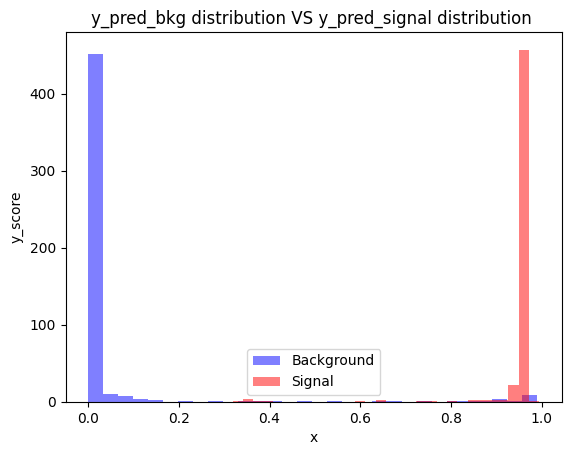

In [13]:
counts, bins, _ = plt.hist(y_test_scores[y_test_arr == 0], bins=30, alpha=0.5, color='b', label='Background')
counts2, bins2, _ = plt.hist(y_test_scores[y_test_arr == 1], bins=30, alpha=0.5, color='r', label='Signal')

print (counts)
print (bins)

plt.xlabel('x')
plt.ylabel('y_score')
plt.title('y_pred_bkg distribution VS y_pred_signal distribution ')
plt.legend()
plt.show()

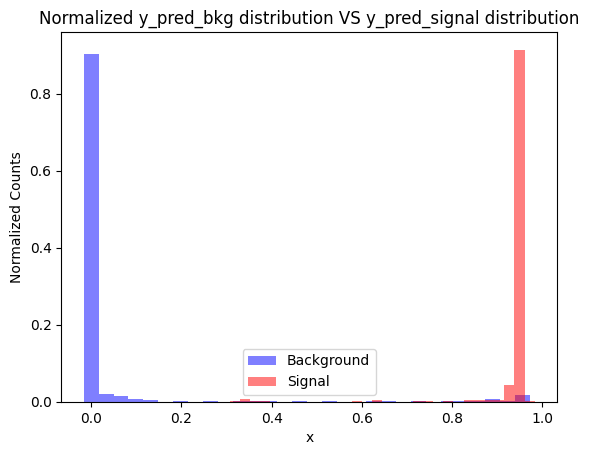

In [14]:
counts = counts / sum(counts)
counts2 = counts2 / sum(counts2)

plt.bar(bins[:-1], counts, width=np.diff(bins), alpha=0.5, color='b', label='Background')
plt.bar(bins2[:-1], counts2, width=np.diff(bins2), alpha=0.5, color='r', label='Signal')

plt.xlabel('x')
plt.ylabel('Normalized Counts')
plt.title('Normalized y_pred_bkg distribution VS y_pred_signal distribution')
plt.legend()
plt.show()

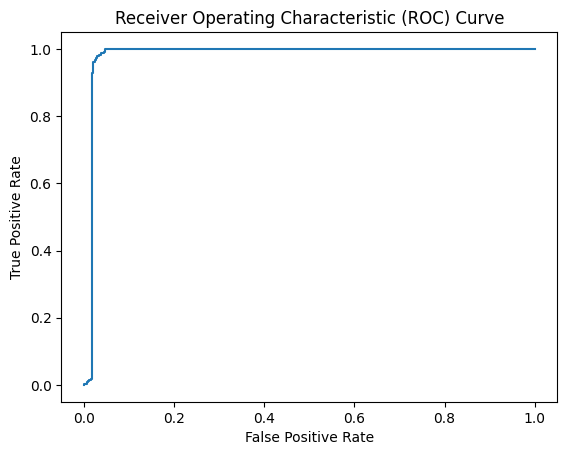

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_scores)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

### VQC

#### Pennylane (V1)

In [16]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import NesterovMomentumOptimizer
from pennylane.optimize import AdamOptimizer
from functools import partial
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates.embeddings import AngleEmbedding



In [17]:
def accuracy(labels, predictions):

    loss = 0
    for l, p in zip(labels, predictions):
        if abs(l - p) < 1e-5:
            loss = loss + 1
    loss = loss / len(labels)

    return loss


In [18]:
# Retormalize data weights
w_train[y_train_arr == 1] = (w_train[y_train_arr == 1] / w_train[y_train_arr == 1].sum()) * y_train_arr.shape[0] / 2
w_train[y_train_arr == 0] = (w_train[y_train_arr == 0] / w_train[y_train_arr == 0].sum()) * y_train_arr.shape[0] / 2
        
w_test[y_test_arr == 1] = (w_test[y_test_arr == 1] / w_test[y_test_arr == 1].sum()) * w_test.shape[0] / 2
w_test[y_test_arr == 0] = (w_test[y_test_arr == 0] / w_test[y_test_arr == 0].sum()) * w_test.shape[0] / 2
        
w_val[y_test_arr == 1] = (w_val[y_test_arr == 1] / w_val[y_test_arr == 1].sum()) * w_val.shape[0] / 2
w_val[y_test_arr == 0] = (w_val[y_test_arr == 0] / w_val[y_test_arr == 0].sum()) * w_val.shape[0] / 2

W = np.concatenate([w_train, w_test,w_val])
X = np.concatenate([x_train, x_test,x_val])
Y= np.concatenate([y_train_arr, y_test_arr,y_val_arr])

### Normalize the data for angle embeding  (Put the data between -pi and pi)
X = (((X - X.min()) / (X.max() - X.min())) * 2 - 1) * (np.pi)

w_train = W[:1000]
w_test = W[1000:2000]
w_val = W[2000:]

x_train = X[:1000]
x_test = X[1000:2000]
x_val = X[2000:]

y_train = Y[:1000]
y_test = Y[1000:2000]
y_val = Y[2000:]

def square_loss(labels, predictions):
    loss = 0
    for l, p in zip(labels, predictions):
        loss = loss + (l - p) ** 2

    loss = loss / len(labels)
    return loss


def circuit(n_features, n_layers, weights, x):
        # Embedding
        
        qml.AngleEmbedding(x,range (0, n_features),rotation="X" )

        # For every layer
        for layer in range(n_layers):
            W1 = weights[layer]

            # Define Rotations
            for i in range(0,n_features):
                qml.Rot(W1[i, 0], W1[i, 1], W1[i, 2], wires=i)

            # Entanglement
            if n_features != 1:
                if n_features > 2:
                    for i in range(n_features):
                        if i == n_features - 1:
                            qml.CNOT(wires=[i, 0])
                        else:
                            qml.CNOT(wires=[i, i + 1])
                else:
                    qml.CNOT(wires=[1, 0])

        return qml.expval(qml.PauliZ(0))

    
def classifier(n_features, n_layers, weights, x):
        #c = circuit(n_features, n_layers, weights, x)
        dev=qml.device("default.qubit", wires=n_features)
        return qml.QNode(circuit, dev)(n_features, n_layers, weights, x)
    
    
def cost(n_features, n_layers,weights,X,Y,W):  
        # Compute predictions
        y_scores = [(classifier(n_features, n_layers,weights, x) + 1) / 2 for x in X]

        loss = square_loss(Y, y_scores)
        loss = loss * W
        loss = loss.sum()
        print (loss)
        
        return loss
    
    
def train_step(n_features, n_layers,x_train,y_train, w_train, weights, opt):
        
        # Only require grad if necessary
        x_train = np.array(x_train, requires_grad=False)
        y_train = np.array(y_train, requires_grad=True)
        w_train = np.array(w_train, requires_grad=False)

        # Compute cost and update weights
        weights, loss = opt.step_and_cost(cost, n_features, n_layers,weights, X=x_train, Y=y_train, W=w_train)

        return loss, weights
    
def validation_step(n_features, n_layers,x_val,y_val,w_val, weights,best_score,epoch_number):
        ###################
        # Validation Step #
        ###################


        # Remove grad
        X_val = np.array(x_val, requires_grad=False)
        Y_val = np.array(y_val, requires_grad=False)
        W_val = np.array(w_val, requires_grad=False)

        # This will be between -1 and 1, we need to convert to between 0 and 1
        y_scores = np.array([classifier(n_features, n_layers,weights, x) for x in X_val])
        y_scores = (y_scores + 1) / 2

        # Retormalize weights
        W_val[Y_val == 1] = (W_val[Y_val == 1] / W_val[Y_val == 1].sum()) * W_val.shape[0] / 2
        W_val[Y_val == 0] = (W_val[Y_val == 0] / W_val[Y_val == 0].sum()) * W_val.shape[0] / 2

        # Calculate ROC
        auc_score = roc_auc_score(y_true=Y_val, y_score=y_scores, sample_weight=W_val)
    

        # Check if new best score
        if best_score is None or auc_score > best_score:
            best_score = auc_score
            best_score_epoch = epoch_number
            best_weights = weights


        return best_score, best_score_epoch, best_weights
        
        

def train(n_features, n_layers,x_train,y_train,learning_rate, weights, max_epochs, epoch_number):
    
        # Initialize optimizer
        opt = AdamOptimizer(learning_rate)

        
        # For every epoch
        for epoch in range(epoch_number, max_epochs):
            epoch_number = epoch

            # Update weights
            loss,nf_nl_weights = train_step(n_features, n_layers,x_train,y_train, w_train, weights, opt)
            
            weights = nf_nl_weights[2:]
            weights =weights[0]

            # Validate the model
            if epoch_number == max_epochs - 1:
                best_score, best_score_epoch, best_weights=validation_step(n_features, n_layers,x_val,y_val,w_val,weights,None,epoch_number)

        return best_score, best_weights

In [19]:
# treino

n_features = 2
n_layers = 3

# Random weight initialization
weights = 0.01 * np.random.randn(n_layers, n_features, 3, requires_grad=True)

# We create a quantum device with n_features "wires" (or qubits)
dev = qml.device("default.qubit", wires=n_features)


best_score, best_weights = train (n_features, n_layers,x_train,y_train_arr,0.01, weights, 100, 0)




Autograd ArrayBox with value 298.0502680126509
Autograd ArrayBox with value 297.7238355785563
Autograd ArrayBox with value 297.1557381414152
Autograd ArrayBox with value 296.32246542615724
Autograd ArrayBox with value 295.2229975889776
Autograd ArrayBox with value 293.8620852583186
Autograd ArrayBox with value 292.2500556641121
Autograd ArrayBox with value 290.40336995121265
Autograd ArrayBox with value 288.34508973587583
Autograd ArrayBox with value 286.1051568695632
Autograd ArrayBox with value 283.7204244217969
Autograd ArrayBox with value 281.23437085809
Autograd ArrayBox with value 278.6964202734205
Autograd ArrayBox with value 276.1607819817647
Autograd ArrayBox with value 273.68471185011754
Autograd ArrayBox with value 271.3260839242523
Autograd ArrayBox with value 269.14014506613717
Autograd ArrayBox with value 267.1753242379791
Autograd ArrayBox with value 265.4680543684494
Autograd ArrayBox with value 264.0369409520689
Autograd ArrayBox with value 262.877600044833
Autograd Ar

In [20]:
print (best_score)

0.414710174530703


In [21]:
# testar

def test(n_features, n_layers,x_test,y_test,w_test, weights):
    # Remove grad
        X_test = np.array(x_test, requires_grad=False)
        Y_test = np.array(y_test, requires_grad=False)
        W_test = np.array(w_test, requires_grad=False)

        # This will be between -1 and 1, we need to convert to between 0 and 1
        y_scores = np.array([classifier(n_features, n_layers,weights, x) for x in X_test])
        y_scores = (y_scores + 1) / 2

        # Retormalize weights
        W_test[Y_test == 1] = (W_test[Y_test == 1] / W_test[Y_test == 1].sum()) * W_test.shape[0] / 2
        W_test[Y_test == 0] = (W_test[Y_test == 0] / W_test[Y_test == 0].sum()) * W_test.shape[0] / 2

        # Calculate ROC
        auc_score = roc_auc_score(y_true=Y_test, y_score=y_scores, sample_weight=W_test)
        
        return auc_score
    
auc_score = test(n_features, n_layers,x_test,y_test,w_test, best_weights)
print (auc_score)

0.4045683231155547
